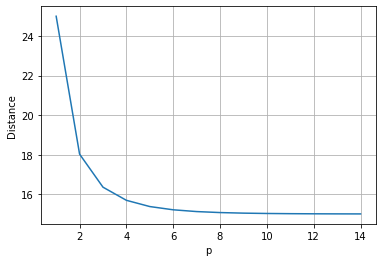

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([0, 0])
x2 = np.array([15, 10])
p = [i for i in range(1, 15)]
dist =  []

for i in range(1, 15):
    dist.append(np.power(sum((abs(x1 - x2))**i), 1/i))
    
plt.plot(p, dist)
plt.xlabel('p')
plt.ylabel('Distance')
plt.grid()
plt.show()

In [1]:
import boto3
import pandas as pd
import numpy as np

## Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'data-445'
bucket = s3.Bucket(bucket_name)

## Defining the file to be read from s3 bucket
file_key = 'Chapter7/Credit_Card_Clustering.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
credit_card = pd.read_csv(file_content_stream)

## Removing observation with NaN
credit_card = credit_card.dropna()
credit_card.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

## Selecting variables of interest
X = credit_card.drop(['CUST_ID'], axis = 1)

## Standardizing the data 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Fitting the k-NN 
knn_md = NearestNeighbors(n_neighbors = 10, algorithm = 'brute').fit(X)

## Selecting the 100 data-point
x_100 = X[99, :]

## Finding the 10-nearest neighbors of x_100
knn_md.kneighbors([x_100])

(array([[0.        , 0.15285636, 0.16804653, 0.16821934, 0.18200092,
         0.19604685, 0.21296034, 0.21329994, 0.21382817, 0.21459301]]),
 array([[  99, 5382, 2842, 4007, 4433, 1991,  453, 3743,  693, 1937]]))

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

## Selecting variables of interest
X = credit_card.drop(['CUST_ID'], axis = 1)

## Standardizing the data 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Fitting the k-NN 
knn_md = NearestNeighbors(n_neighbors = 10, algorithm = 'kd_tree').fit(X)

## Selecting the 100 data-point
x_100 = X[99, :]

## Finding the 10-nearest neighbors of x_100
knn_md.kneighbors([x_100])

(array([[0.        , 0.15285636, 0.16804653, 0.16821934, 0.18200092,
         0.19604685, 0.21296034, 0.21329994, 0.21382817, 0.21459301]]),
 array([[  99, 5382, 2842, 4007, 4433, 1991,  453, 3743,  693, 1937]]))

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

## Selecting variables of interest
X = credit_card.drop(['CUST_ID'], axis = 1)

## Standardizing the data 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Fitting the k-NN 
knn_md = NearestNeighbors(n_neighbors = 10, algorithm = 'ball_tree').fit(X)

## Selecting the 100 data-point
x_100 = X[99, :]

## Finding the 10-nearest neighbors of x_100
knn_md.kneighbors([x_100])

(array([[0.        , 0.15285636, 0.16804653, 0.16821934, 0.18200092,
         0.19604685, 0.21296034, 0.21329994, 0.21382817, 0.21459301]]),
 array([[  99, 5382, 2842, 4007, 4433, 1991,  453, 3743,  693, 1937]]))

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

## Selecting variables of interest
X = credit_card.drop(['CUST_ID'], axis = 1)

## Standardizing the data 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Fitting k-means with 5 clusters
kmeans_md = KMeans(n_clusters = 5, init = 'random', n_init = 20).fit(X)

## Extracting cluster labels
kmeans_md.labels_

array([1, 1, 2, ..., 0, 1, 2], dtype=int32)

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

## Selecting variables of interest
X = credit_card.drop(['CUST_ID'], axis = 1)

## Standardizing the data 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Fitting k-means with 5 clusters
kmeans_plus_plus_md = KMeans(n_clusters = 5, init = 'k-means++', n_init = 20).fit(X)

## Extracting cluster labels
kmeans_plus_plus_md.labels_

array([2, 2, 0, ..., 1, 2, 0], dtype=int32)

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

## Selecting variables of interest
X = credit_card.drop(['CUST_ID'], axis = 1)

## Standardizing the data 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Fitting k-means with 5 clusters
kmeans_plus_plus_md = KMeans(n_clusters = 5, init = 'k-means++', n_init = 20).fit(X)

## Computing the CH score
CH_score = calinski_harabasz_score(X, kmeans_plus_plus_md.labels_)
CH_score

3519.579649622118

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

## Selecting variables of interest
X = credit_card.drop(['CUST_ID'], axis = 1)

## Standardizing the data 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Fitting k-means with 5 clusters
kmeans_plus_plus_md = KMeans(n_clusters = 5, init = 'k-means++', n_init = 20).fit(X)

## Computing the CH score
DB_score = davies_bouldin_score(X, kmeans_plus_plus_md.labels_)
DB_score

1.3185118161517475

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Selecting variables of interest
X = credit_card.drop(['CUST_ID'], axis = 1)

## Standardizing the data 
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Fitting k-means with 5 clusters
kmeans_plus_plus_md = KMeans(n_clusters = 5, init = 'k-means++', n_init = 20).fit(X)

## Computing the CH score
silhouette_score = silhouette_score(X, kmeans_plus_plus_md.labels_)
silhouette_score

0.31579662491835225